In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("data/data2021.csv", sep=";", decimal=",")

In [3]:
df.head(18)

,Kabupaten,jumlah_penduduk,total_sampah_ton,jumlah_truk,jumlah_motor,jumlah_tps,total_armada,sampah_perpenduduk,sampah_perarmada,sampah_pertps
0,bogor,5484.15,701,11,265,188,276,0.127823,2.539855,3.728723
1,sukabumi,2747.45,261.2,13,13,188,26,0.095070,10.046154,1.389362
2,cianjur,2500.64,223.8,2,24,191,26,0.089497,8.607692,1.171728
3,bandung,3652.4,738.05,37,18,197,55,0.202073,13.419091,3.746447
4,garut,2613.53,283.34,11,31,161,42,0.108413,6.746190,1.759876
5,tasikmalaya,1876.89,111.12,2,39,100,41,0.059204,2.710244,1.111200
6,ciamis,1234.83,115.2,9,24,98,33,0.093292,3.490909,1.175510
7,kuningan,1175.95,290.3,6,10,212,16,0.246864,18.143750,1.369340
8,cirebon,2301.33,170.15,19,13,301,32,0.073936,5.317188,0.565282
9,majalengka,1315.01,329,7,17,200,24,0.250188,13.708333,1.645000


In [4]:
df.isna().sum()

Kabupaten             0
jumlah_penduduk       0
total_sampah_ton      0
jumlah_truk           0
jumlah_motor          0
jumlah_tps            0
total_armada          0
sampah_perpenduduk    0
sampah_perarmada      0
sampah_pertps         0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df = df.replace(",", ".", regex=True)
df.columns = df.columns.str.strip().str.lower()

for col in df.columns:
    if col != 'kabupaten':
        df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.dropna()

In [7]:
features = [
    'jumlah_penduduk',
    'total_sampah_ton',
    'jumlah_truk',
    'jumlah_motor',
    'jumlah_tps',
    'total_armada',
    'sampah_perpenduduk',
    'sampah_perarmada',
    'sampah_pertps'
]


In [8]:
X = df[features]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(X_pca)

df["cluster"] = cluster

In [12]:
df_cluster = df[
    ["kabupaten", "PC1", "PC2", "cluster"]
].sort_values("cluster")

In [13]:
df_cluster.head(18)

,kabupaten,PC1,PC2,cluster
1,sukabumi,-0.768064,-0.161175,0
2,cianjur,-1.098087,-0.481061,0
5,tasikmalaya,-1.256226,-1.976446,0
4,garut,-0.428488,-0.629968,0
6,ciamis,-1.454030,-1.535105,0
8,cirebon,-1.015216,-0.549710,0
13,purwakarta,-1.379598,-0.466382,0
16,bandung barat,-1.061250,-1.603936,0
17,pangandaran,-2.158972,-2.085959,0
7,kuningan,-1.520836,2.000966,1


In [14]:
pca.explained_variance_ratio_

array([0.45803421, 0.25610149])

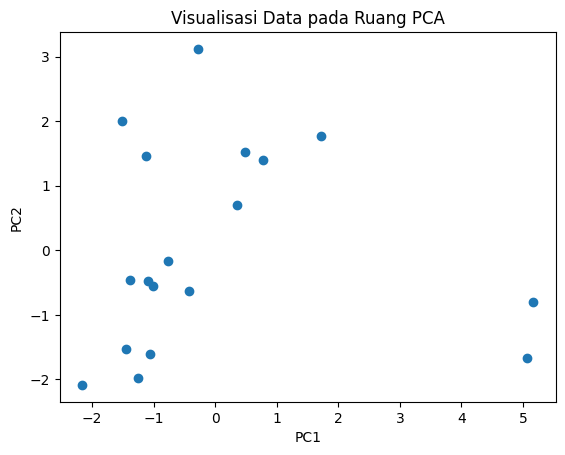

In [15]:
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi Data pada Ruang PCA")
plt.show()

In [17]:
pickle.dump(kmeans, open("model2021/kmeans_2021.pkl", "wb"))
pickle.dump(scaler, open("model2021/scaler_2021.pkl", "wb"))
pickle.dump(pca, open("model2021/pca_2021.pkl", "wb"))